In [2]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np

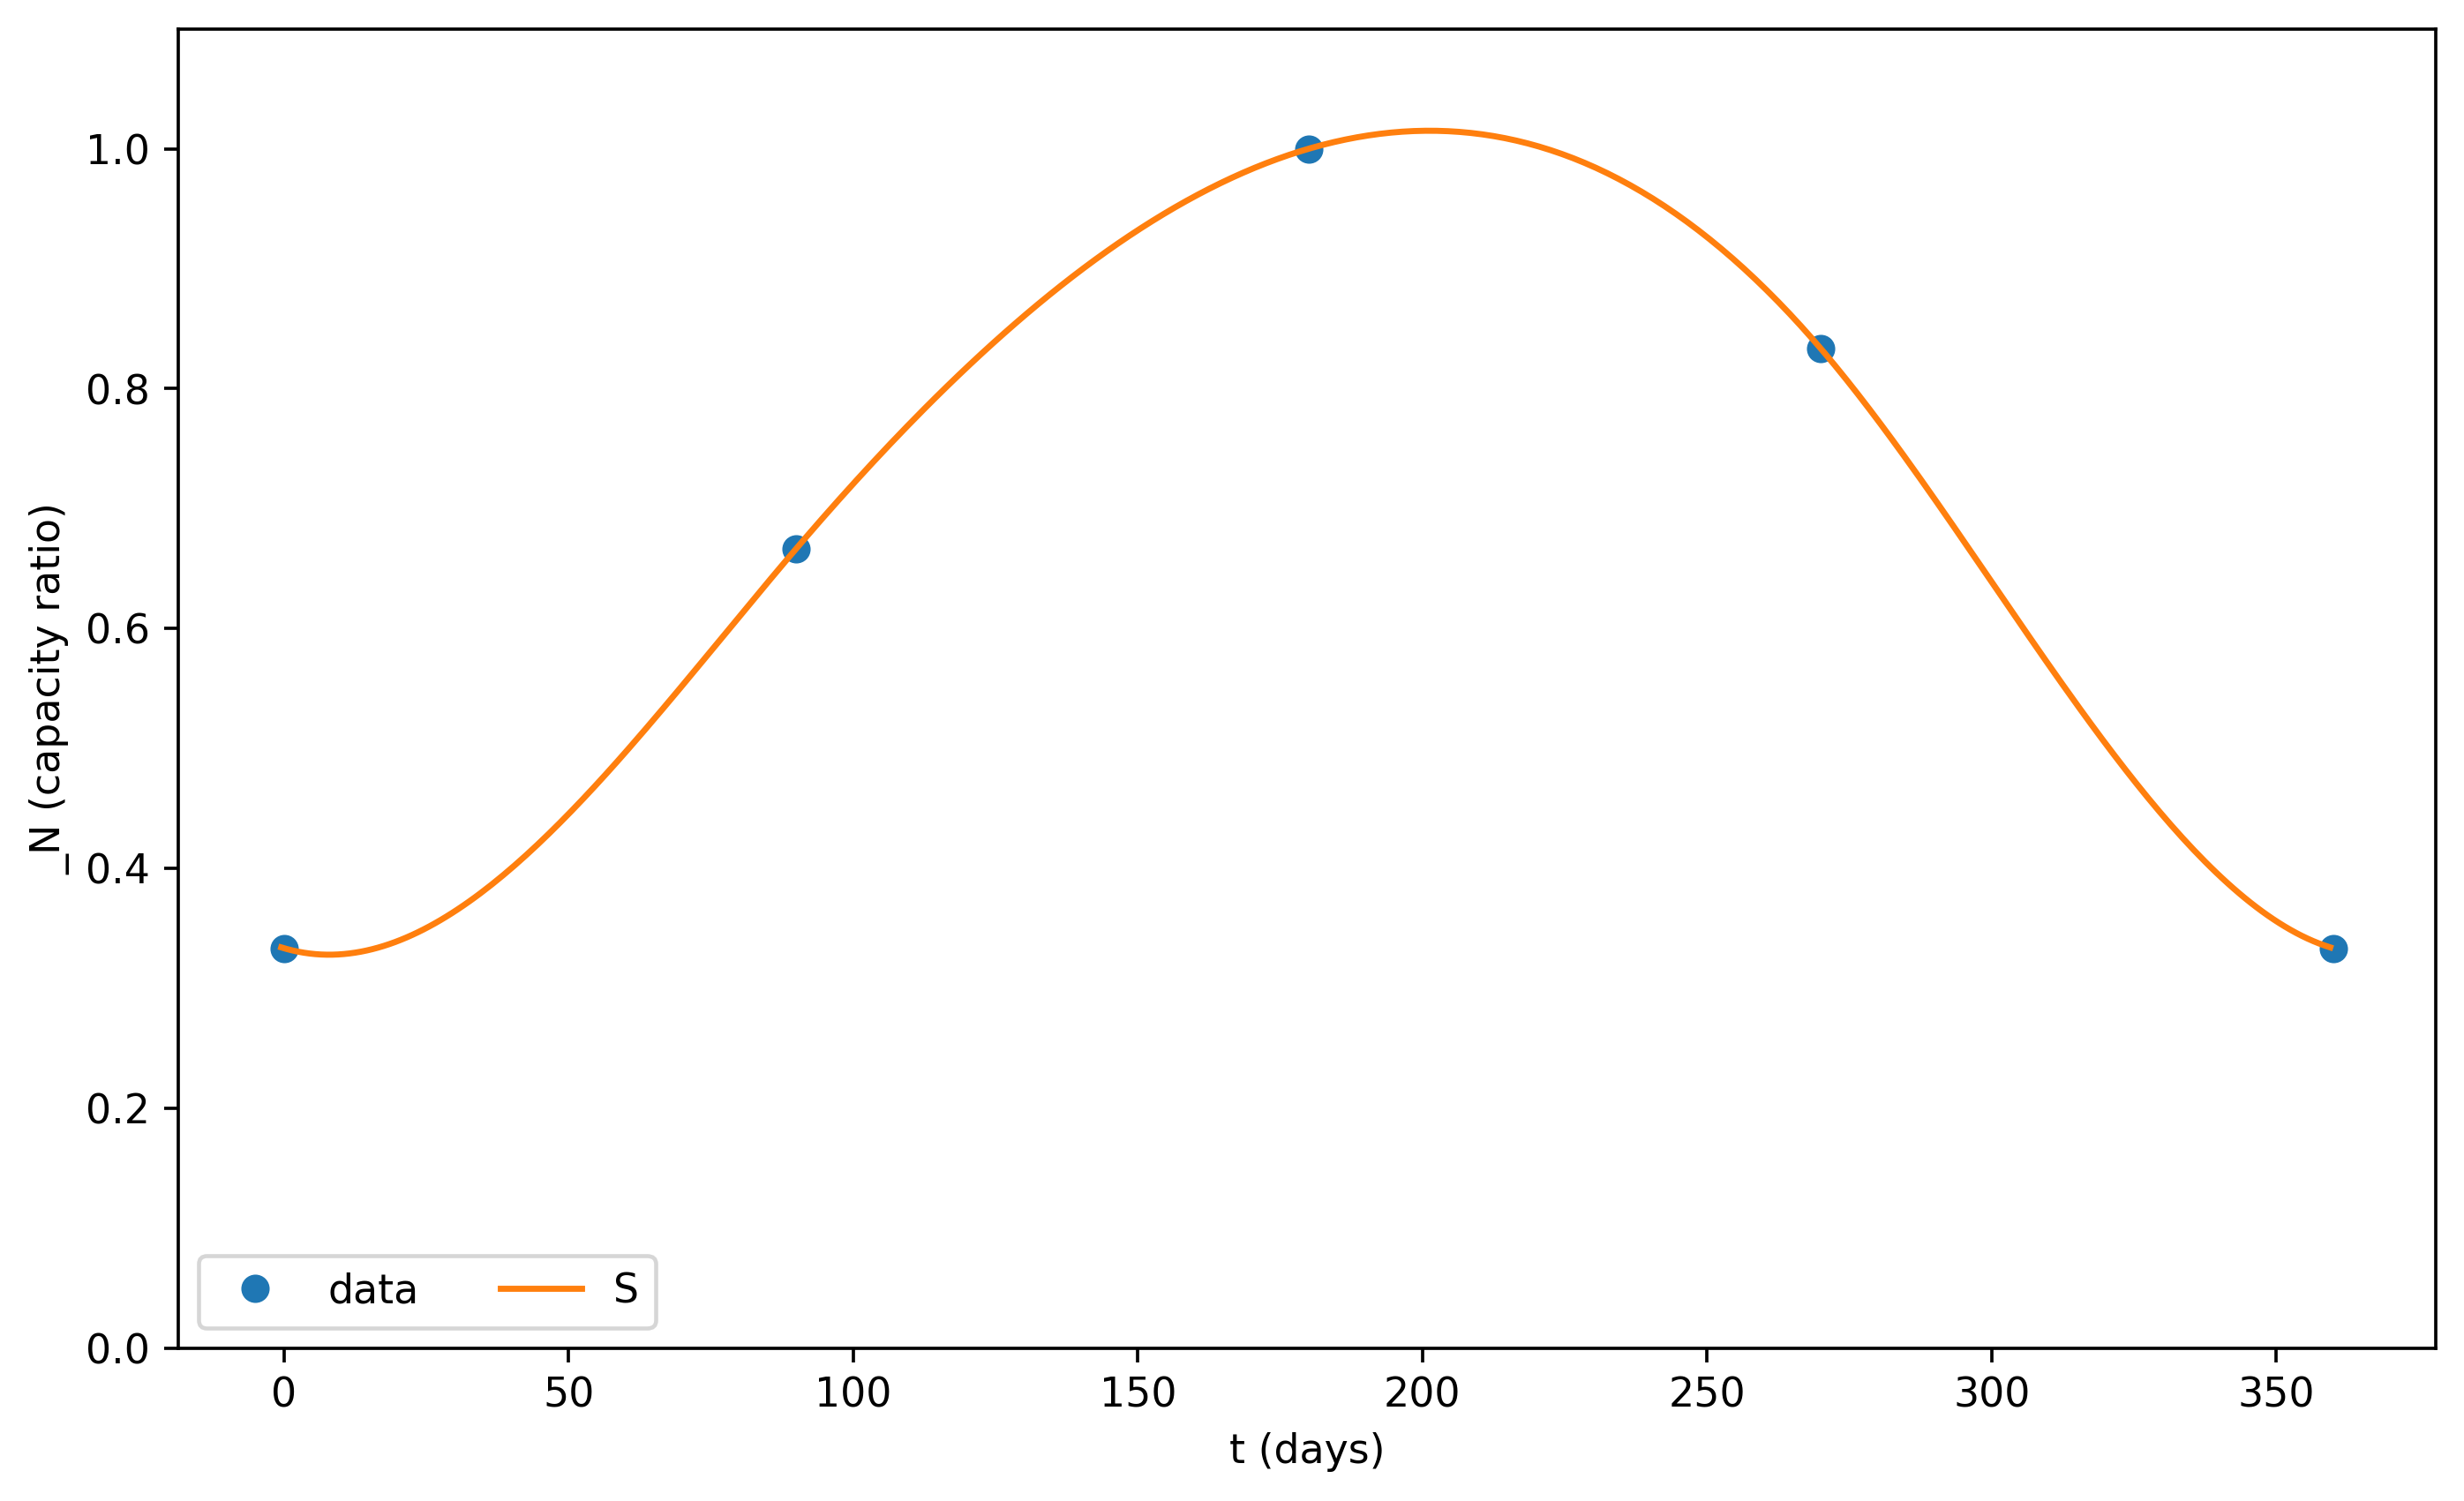

In [25]:
x = [0, 90, 180, 270, 360]
y = [1/3, 2/3, 1, 5/6, 1/3]

cs = CubicSpline(x, y, bc_type="periodic")
xs = np.arange(-0.5, 360.5, 1)
fig, ax = plt.subplots(figsize=(10, 6), dpi=330)
ax.plot(x, y, 'o', label='data')
ax.plot(xs, cs(xs), label="S")
ax.set_ylim(0, 1.1)
ax.legend(loc='lower left', ncol=2)

ax.set_xlabel("t (days)")
ax.set_ylabel("_N (capacity ratio)")

plt.show()

In [31]:
cs.c

array([[-4.00091449e-07, -5.71559214e-08, -5.71559214e-08,
         5.14403292e-07],
       [ 9.25925926e-05, -1.54320988e-05, -3.08641975e-05,
        -4.62962963e-05],
       [-1.38888889e-03,  5.55555556e-03,  1.38888889e-03,
        -5.55555556e-03],
       [ 3.33333333e-01,  6.66666667e-01,  1.00000000e+00,
         8.33333333e-01]])

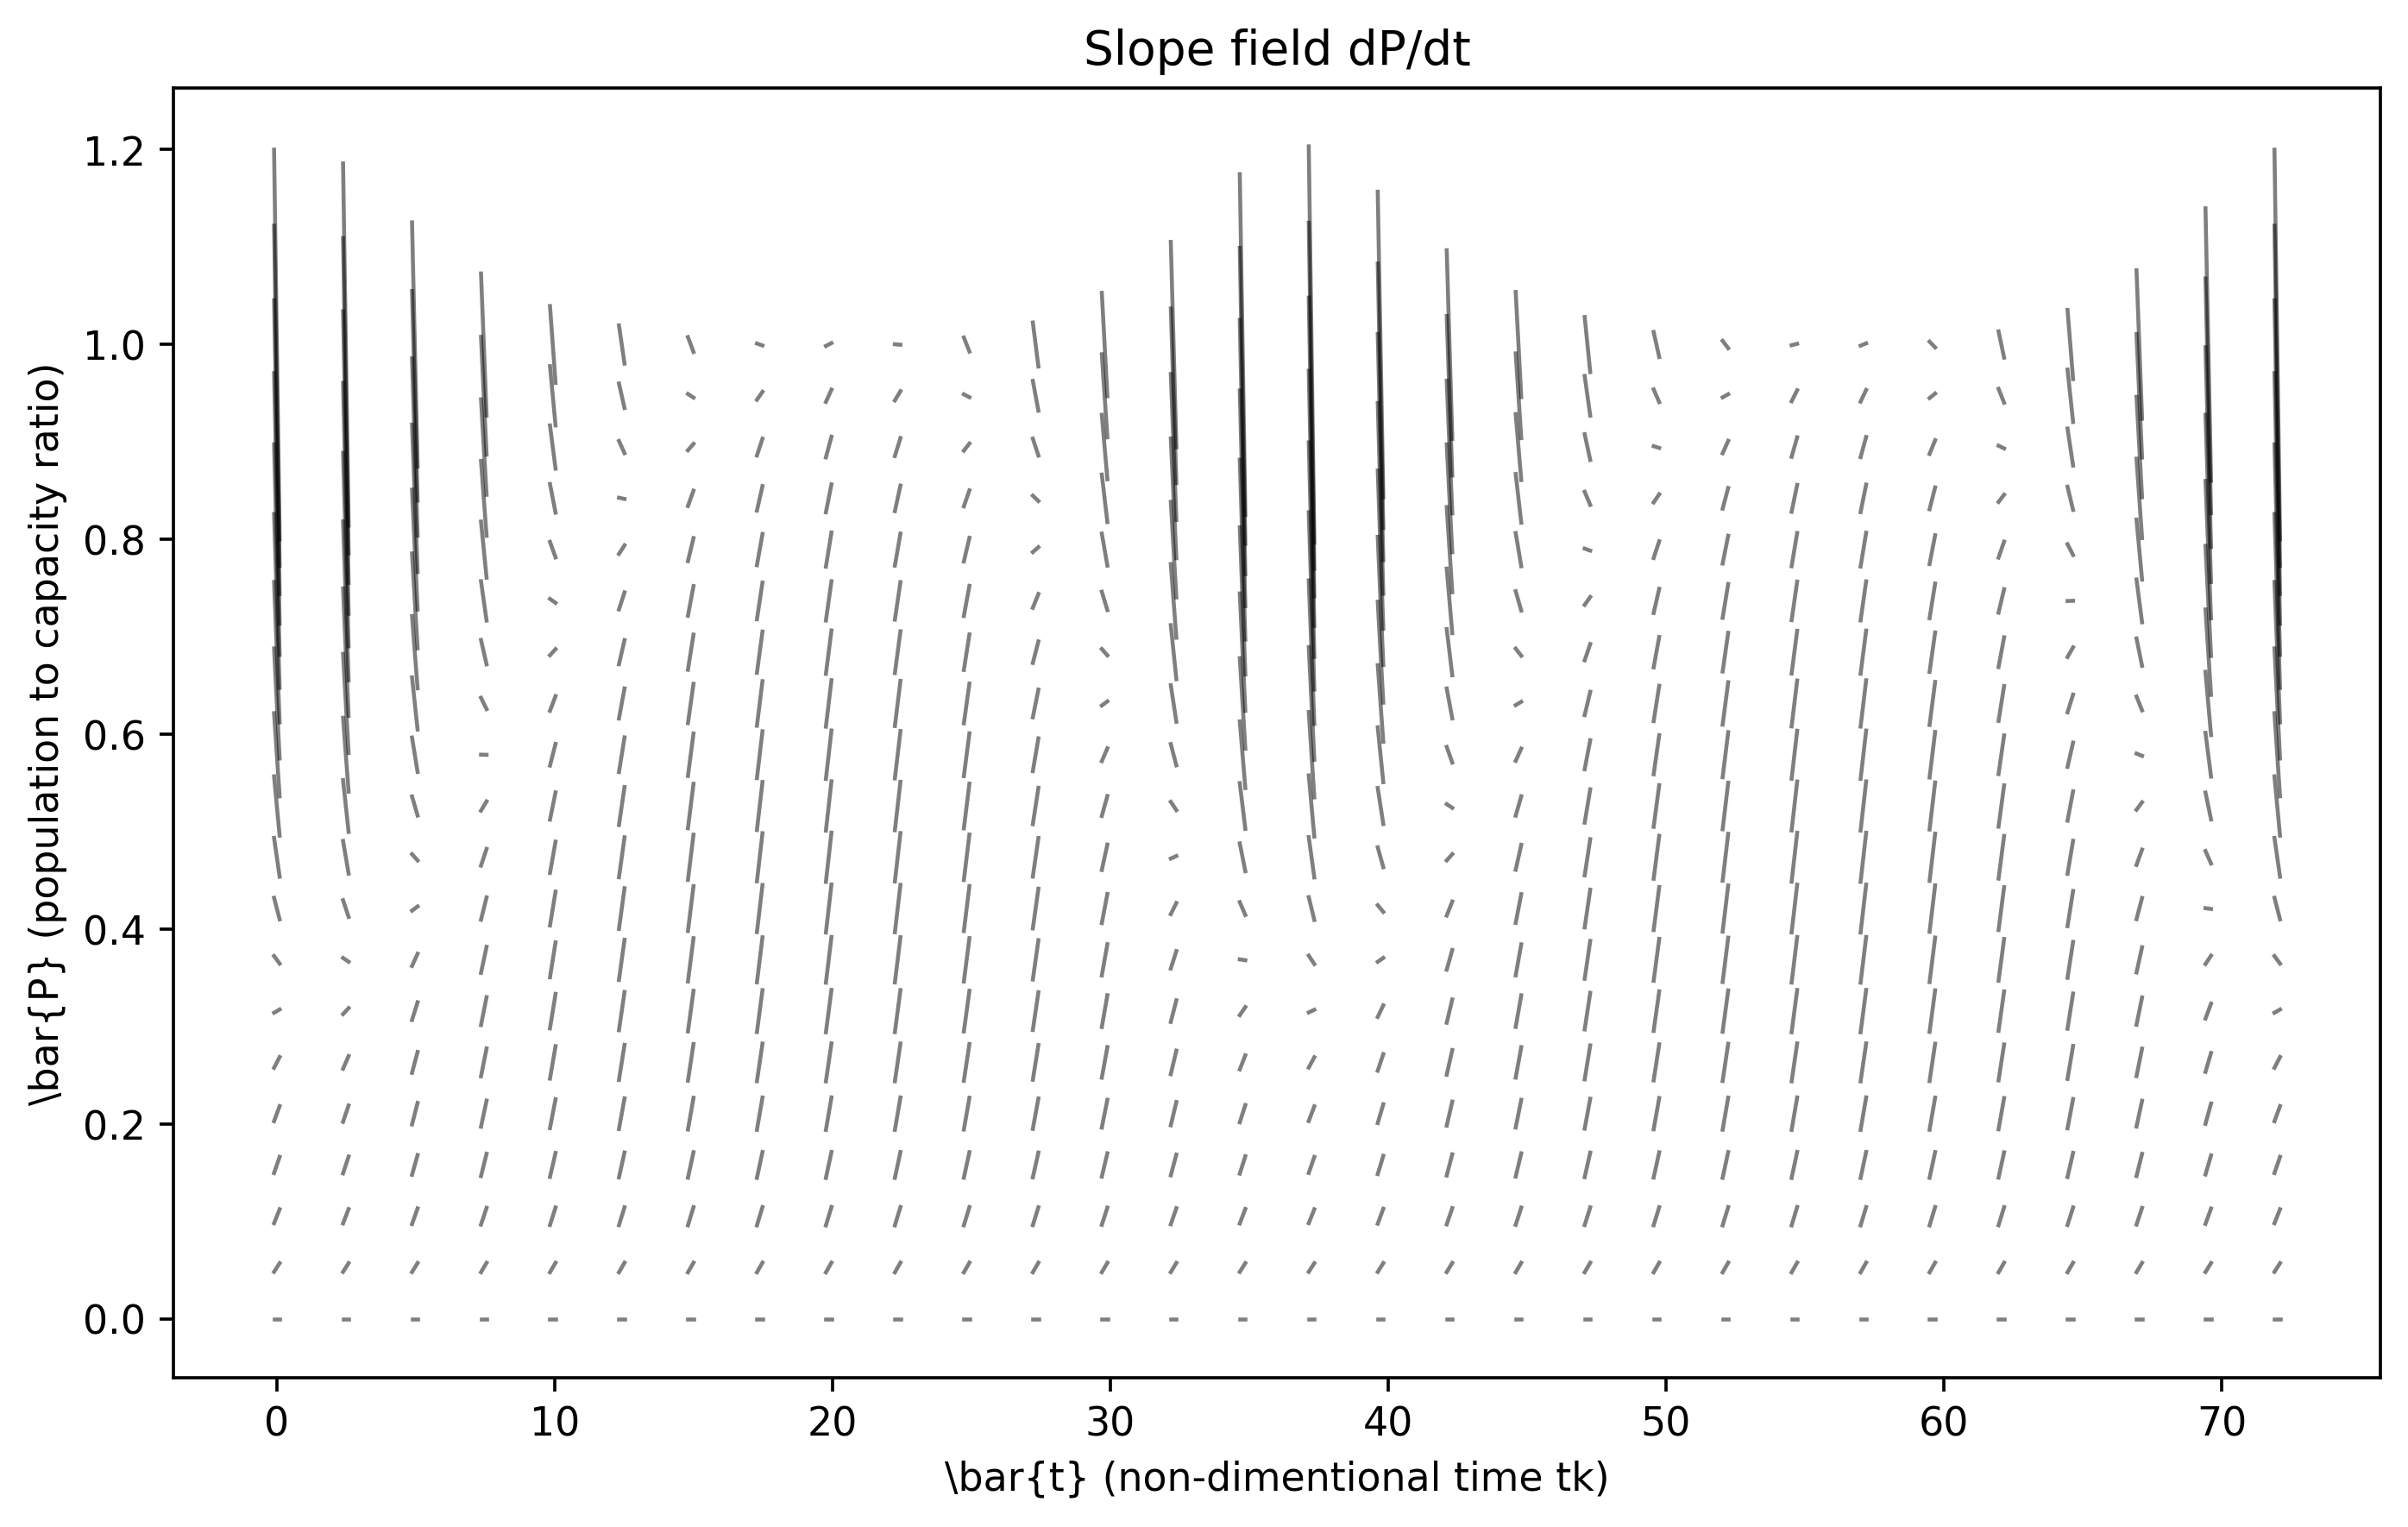

In [72]:
H = 0
k = 0.1

def diff(t, P, H, k):
    return (1 - P / cs(t / k))*P - H

ts = np.linspace(0, 72, 30)
Ps = np.linspace(0, 1, 20)

plt.figure(figsize=(10, 6), dpi=330)

# http://firsttimeprogrammer.blogspot.com/2014/09/generate-slope-fields-in-r-and-python.html
for t in ts:
    for P in Ps:
        slope = diff(t, P, H, k)
        domain = np.linspace(t - 0.1, t + 0.1, 2)
        def fun(x1, y1):
            z = slope * (domain - x1) + y1
            return z
        plt.plot(domain, fun(t, P), color="black", linewidth=1, alpha=0.5)

plt.title("Slope field dP/dt")
plt.ylabel("\\bar{P} (population to capacity ratio)")
plt.xlabel("\\bar{t} (non-dimentional time tk)")
plt.show()

In [73]:
b = 1
k = 1
L = 1 
h = 1

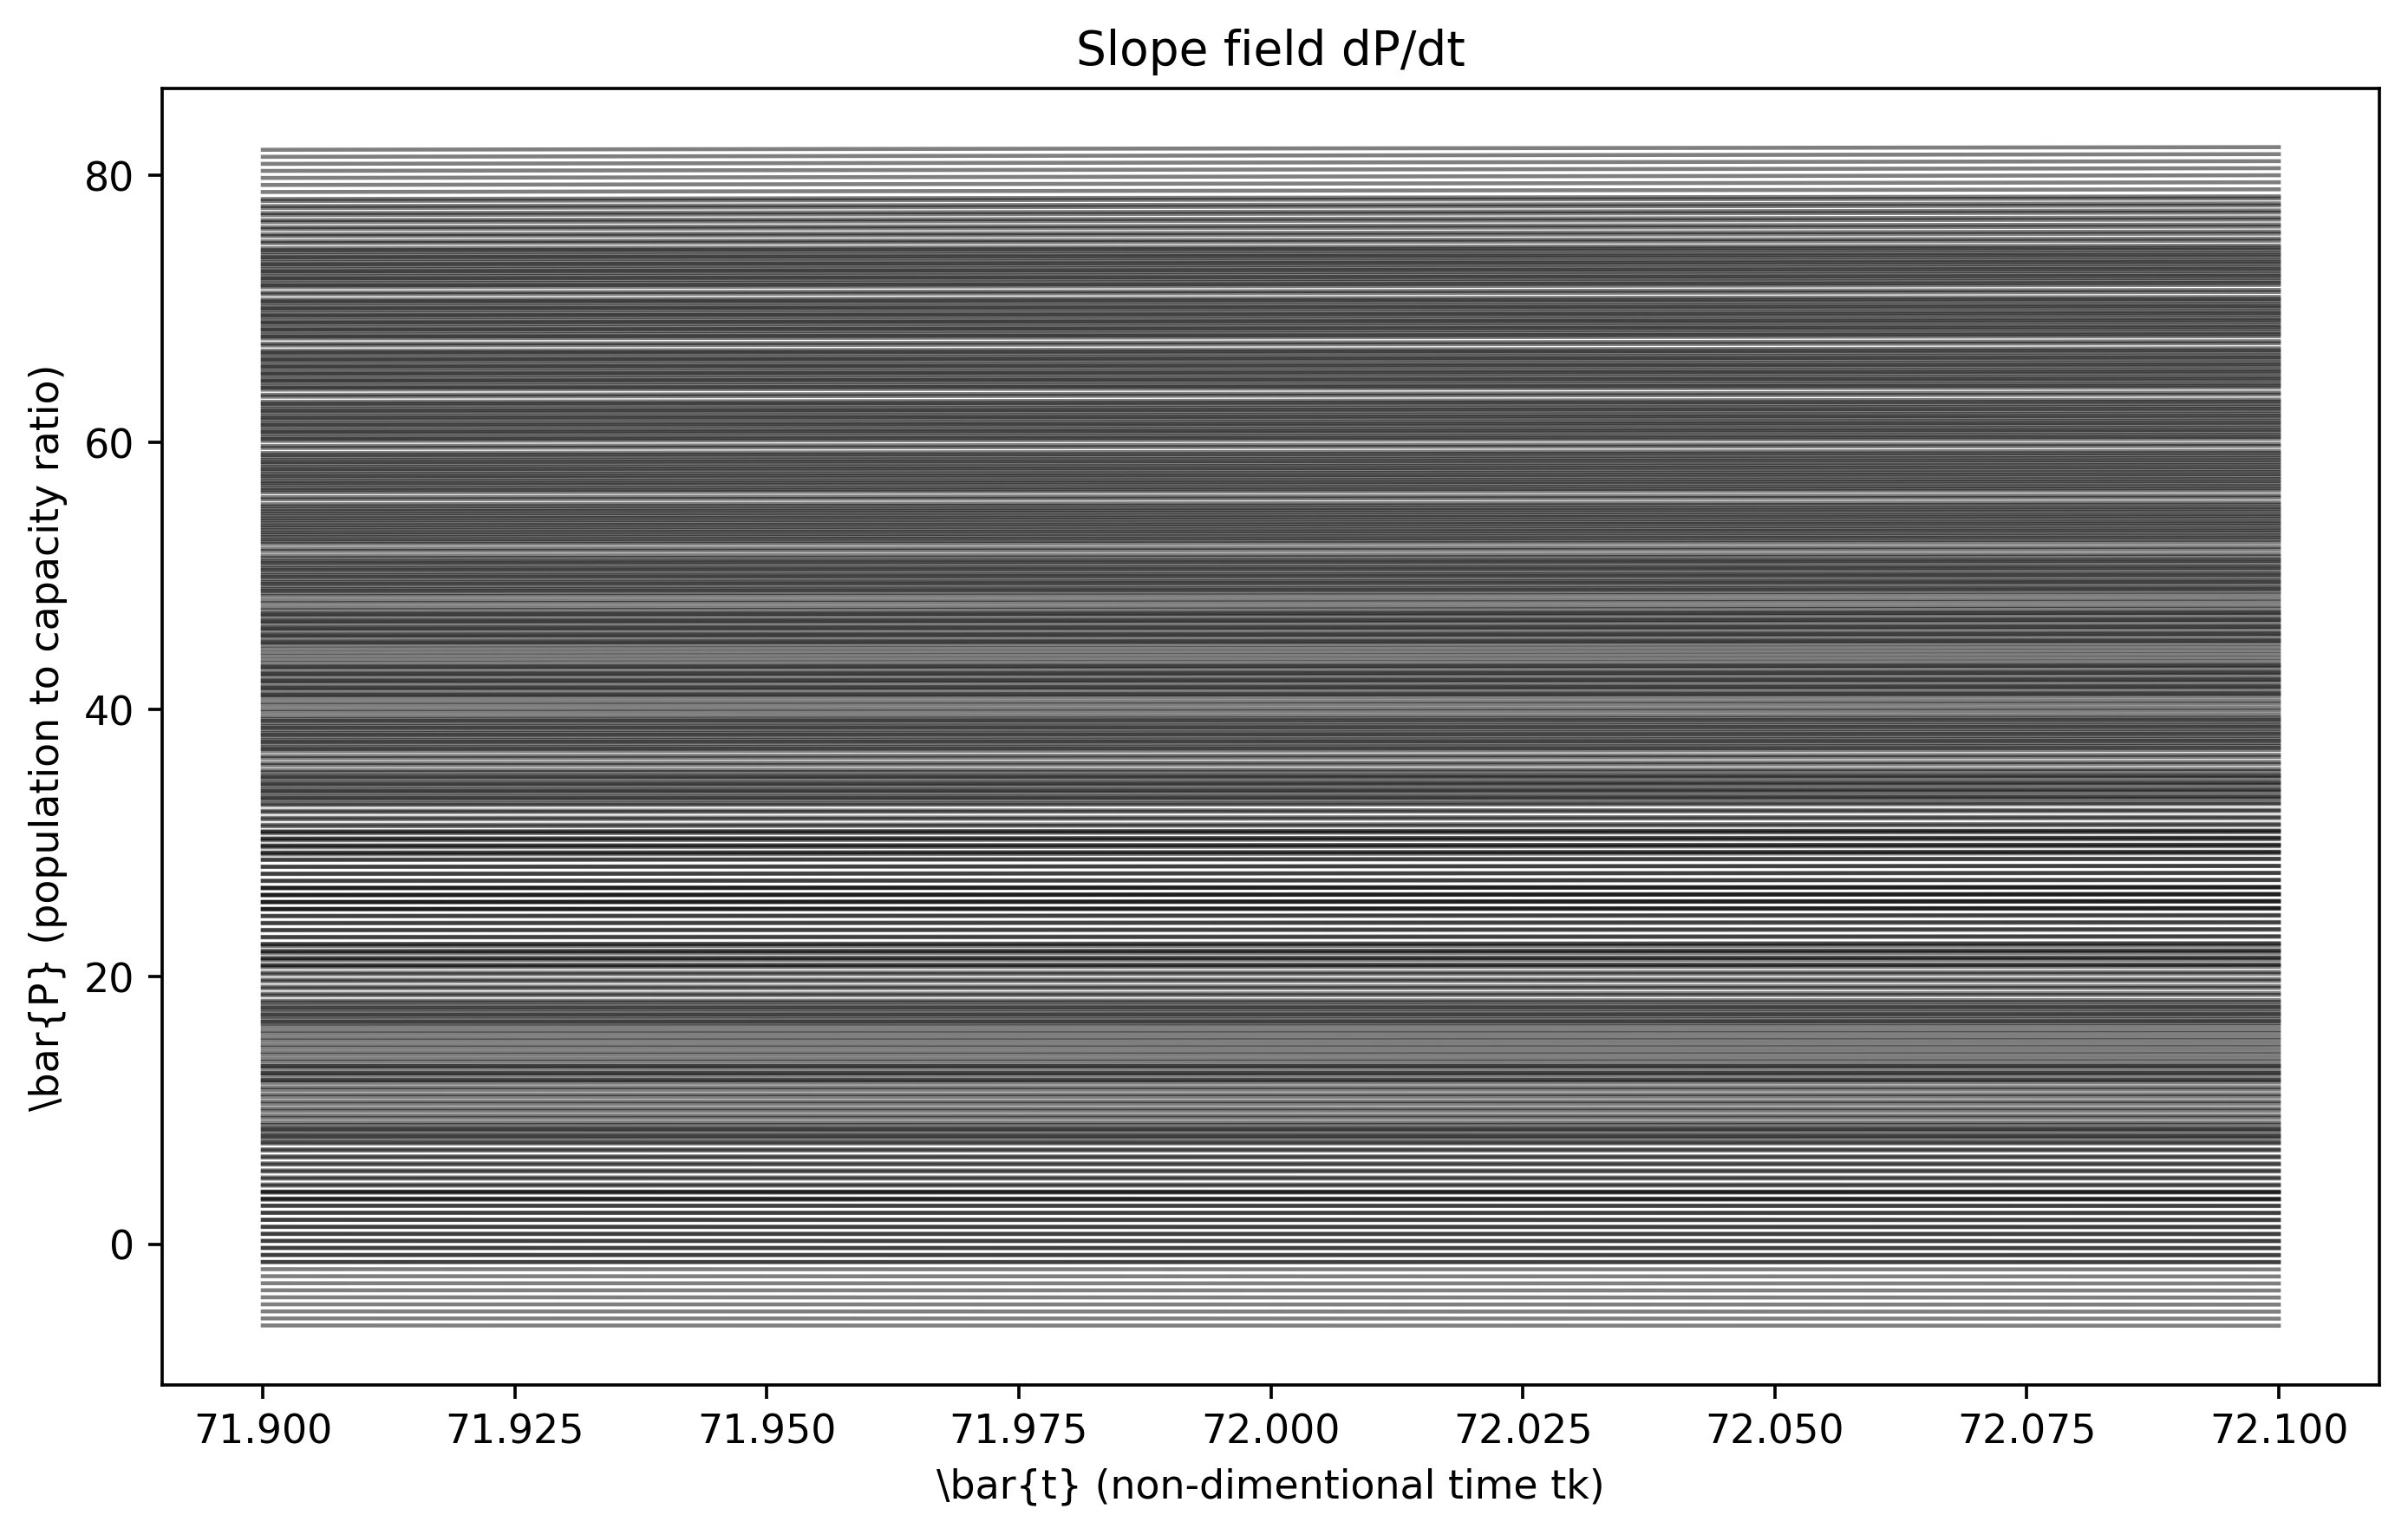

In [75]:
def diff_2(x, b, k, L, h):
    return -b*x - k*x**2/2 + k*L*np.sqrt(h**2 + x**2)

xs = np.linspace(0, 1, 20)
fs = np.linspace(0, 10, 20)

plt.figure(figsize=(10, 6), dpi=330)

# http://firsttimeprogrammer.blogspot.com/2014/09/generate-slope-fields-in-r-and-python.html
for x in xs:
    for f in fs:
        slope = diff_2(x, b, k, L, h)
        domain = np.linspace(t - 0.1, t + 0.1, 2)
        def fun(x1, y1):
            z = slope * (domain - x1) + y1
            return z
        plt.plot(domain, fun(x, f), color="black", linewidth=1, alpha=0.5)

plt.title("Slope field dP/dt")
plt.ylabel("\\bar{P} (population to capacity ratio)")
plt.xlabel("\\bar{t} (non-dimentional time tk)")
plt.show()

In [80]:
branch_1 = lambda L, h: np.sqrt(L**2 - h**2)
branch_2 = lambda L, h: -np.sqrt(L**2 - h**2)
branch_3 = lambda L, h: 0

ls = np.linspace(-10, 10, 100)
pos_ls = ls[ls >= 0]


plt.figure(figsize=(10, 6), dpi=330)
plt.plot(pos_ls, [branch_1(l) for l in pos_ls])
plt.plot(pos_ls, [branch_2(l) for l in pos_ls])
plt.plot(ls, [branch_3(l) for l in ls])

plt.show()

TypeError: <lambda>() missing 1 required positional argument: 'h'

<Figure size 3300x1980 with 0 Axes>